In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/jensk/code/JensKlug/zillows_real_estate/raw_data/HouseTS.csv')

In [3]:
df.head()

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
type(df['zipcode'][0])

numpy.int64

In [6]:
i = 30002
df_onezipcode = df[df['zipcode'] == i]

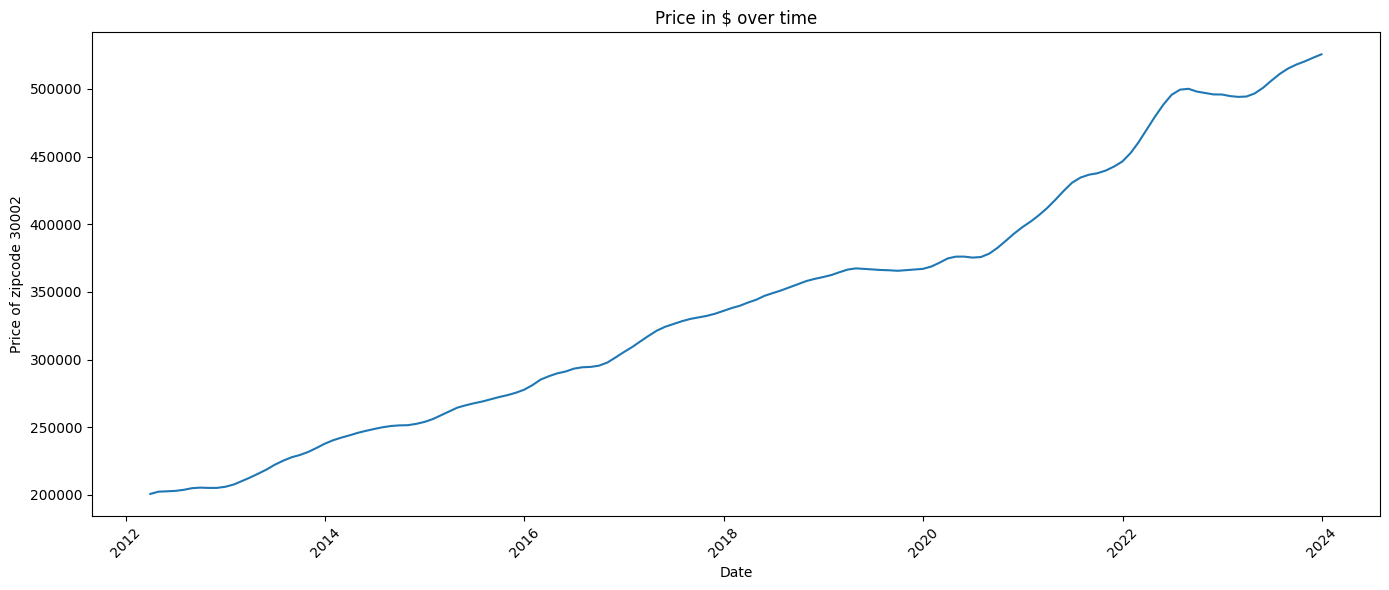

In [7]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_onezipcode, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of zipcode {i}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
k = 'ATL'
df_one_city = df[df['city'] == k]

In [9]:
df_date_price = df[['date', 'price']]
df_date_price

,date,price
0,2012-03-31,200773.999557
1,2012-04-30,202421.064584
2,2012-05-31,202681.309539
3,2012-06-30,202998.603897
4,2012-07-31,203781.903446
...,...,...
884087,2023-08-31,438238.668892
884088,2023-09-30,440569.503271
884089,2023-10-31,442965.899354
884090,2023-11-30,444955.530200


In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_date_price, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of Houses in the US')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes

In [ ]:
df_grouped_by_city_date_mean = df.groupby(['city', 'date'])['price'].mean().reset_index()
df_grouped_by_city_date_mean

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped_by_city_date_mean, x='date', y='price', hue='city')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of metropolian areas in the US.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped_by_city_date_mean, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of metropolian areas in the US.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
j = 'ATL'
atl = df_grouped_by_city_date_mean[df_grouped_by_city_date_mean['city'] == j]

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=atl, x='date', y='price')
plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel(f'Price of {j}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 6))

# Plot all cities (grouped)
sns.lineplot(data=df_grouped_by_city_date_mean, x='date', y='price', label='All Cities', color='gray')

# Plot specific city (e.g., 'atl')
sns.lineplot(data=atl, x='date', y='price', label='Atlanta', color='blue')  # or color='red', etc.

sns.lineplot(data=df_onezipcode, x='date', y='price', label=f'zipcode{i}',color='red')

plt.title('Price in $ over time')
plt.xlabel('Date')
plt.ylabel('Price of metropolitan areas in the US')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
